# Hypothesis testing problems

## Exercise 1

You are a nutritionist researching two different types of diets to see if there is a significant difference in weight loss after one month. You choose two random groups of people; one group follows the first diet, and the other follows the second. At the end of the month, you record the weight loss (in kg) for each person:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

With these data, it seeks to answer the following question: Is there a significant difference in average weight loss between people who followed the first diet and those who followed the second diet?

To draw conclusions, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the test to test the hypothesis. You can use a Student's t-test.
- Analyze the conclusions.

In [16]:
import scipy.stats as stats

diet1 = [2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5]
diet2= [3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2]

hypo_0, hypo_1 = stats.ttest_ind(diet1, diet2)

if hypo_0 > hypo_1:
    print(f"El valor obtenido de la diet1 es mayor a diet2 con un valor de: {hypo_0}, mientras que en diet2 obtenemos {hypo_1}")
elif hypo_0 == hypo_1:
    print(f"Las dietas poseen el mismo valor, es decir se confirma la hipotesis nula")
else:
    print(f"El valor obtenido en la diet2 es mayor a la diet1 con un valor de: {hypo_1}, mientras que en diet1 obtenemos {hypo_0}")

difference_total = sum(abs(x - y) for x, y in zip(diet1, diet2))

print("Las dietas poseen una diferencia de:", difference_total)

mean_diet1 = sum(diet1) / len(diet1)
mean_diet2 = sum(diet2) / len(diet2)
mean_both_diets = (mean_diet1 + mean_diet2) / 2

percent_difference = (difference_total / mean_both_diets) * 100

print("Porcentaje de diferencia entre diet1 y diet2:", percent_difference, "%")


El valor obtenido en la diet2 es mayor a la diet1 con un valor de: 0.004083270191713912, mientras que en diet1 obtenemos -3.5383407969933938
Las dietas poseen una diferencia de: 3.4000000000000004
Porcentaje de diferencia entre diet1 y diet2: 122.05128205128206 %


#Conclusión_
Por los resultados obtenidos se confirma la hipotesis alternativa, ya que existe una gran diferencia entre ambas dietas, se sugiere evaluar cual que resultado se espera obtener para seleccionar la dieta más adecuada.

## ANOVA

**ANOVA** (*Analysis of Variance*) is a statistical technique used to compare the measures of two or more groups. The idea behind ANOVA is to decompose the total variability in the data into two components: between-group variability and within-group variability:

- **Between-group variability**: This variability refers to the differences between the group means. If this variability is considerably larger than the within-group variability, it could be an indication that at least one of the group means is different.
- **Within-group variability**: This variability refers to the dispersion of the data within each group. If all groups have similar variability, then any noticeable difference in group means could be considered significant.

Hypotheses in ANOVA typically include:

- **Null hypothesis** ($H₀$): The means of all groups are equal.
- **Alternative hypothesis** ($H₁$): At least one of the group means is different.

If the ANOVA test result is significant (e.g., a p-value less than a threshold such as 0.05), this suggests that at least one group mean is different.

## Exercise 2

A farmer decides to test three different types of fertilizers to determine if one is superior in terms of corn production. The farmer plants corn on 15 identical plots and uses all three fertilizers (5 plots for each type). At the end of the season, he measures the corn yield (in kg) of each plot, with the following result:

| Fertilizer 1 | Fertilizer 2 | Fertilizer 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

With this data, he seeks to answer the following question: Is there a significant difference in average corn yield between the three types of fertilizers?

To help you, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the ANOVA test.
- Analyze the conclusions.
- If one fertilizer is better than another, how can we know it?

In [7]:
import scipy.stats as stats

fertilizer1 = [20,21,20,19,20]
fertilizer2 = [22,21,23,22,21]
fertilizer3 = [24,23,22,23,24]

p_value, f_value = stats.f_oneway(fertilizer1, fertilizer2, fertilizer3)

print(f"P_value: {p_value}")
print(f"f_value: {f_value}")

if p_value == f_value:
    print("Se concluye que se aprueba la hipotesis nula, ya que los valores son iguales")
else:
    print("Se concluye que se rechaza la hipotesis nula, ya que existe una difencia de valores mayor al rango esperado")




P_value: 20.315789473684188
f_value: 0.00014047824793190475
Se concluye que se rechaza la hipotesis nula, ya que existe una difencia de valores mayor al rango esperado


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    F1     F2      1.8 0.0099 0.4572 3.1428   True
    F1     F3      3.2 0.0001 1.8572 4.5428   True
    F2     F3      1.4 0.0409 0.0572 2.7428   True
--------------------------------------------------


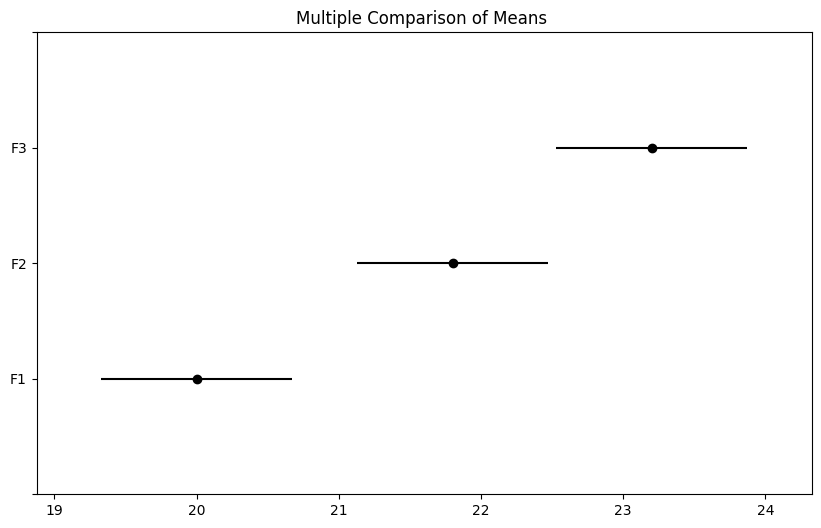

In [3]:
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

fertilizer1 = [20,21,20,19,20]
fertilizer2 = [22,21,23,22,21]
fertilizer3 = [24,23,22,23,24]

data = np.concatenate([fertilizer1, fertilizer2, fertilizer3])
labels = ["F1"] * 5 + ["F2"] * 5 + ["F3"] * 5

result = pairwise_tukeyhsd(data, labels, alpha = 0.05)
print(result)

fig = result.plot_simultaneous()
plt.title('Multiple Comparison of Means ')
plt.show()



En conclusión:

Para poder interpretar la tabla, nos hemos concentrado en la columna “reject” , si es verdadero (true), entonces entre los grupos hay una diferencia significativa. Luego, examine “meandiff”, si es positivo, entonces el grupo2 quedó por delante del grupo1, y viceversa. Para este caso, todos los fertilizantes diferían significativamente. El tercer abono tenía la media más alta, seguida del segundo y luego el primero, así que el tercer abono es el mejor, también al visualizar la gráfica podemos concluir que la hipotesis mencionada anteriormente ha sido confirmada.